# Amazon Product Reviews Dataset Topic Modeling Using LDA Sklearn


Dataset: https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset


# Why We Do Topic Model For Text or Documents? 

#### 1. Discover Hidden Themes in Large Texts

Topic modeling automatically uncovers latent topics within massive collections of unstructured text data (e.g., reviews, articles), helping you understand what people are talking about without reading everything manually.

#### 2. Organize and Summarize Content

It helps summarize and categorize documents or reviews by their dominant themes, making it easier to navigate, search, and cluster similar texts.

#### 3. Improve Text-Based Recommendations or Search

By tagging content with topics, systems can deliver more relevant search results or personalized recommendations based on user interests or query topics.

#### 4. Gain Business or Research Insights

Topic modeling reveals customer concerns, product issues, or trending discussions, providing actionable insights for marketing, product development, or academic analysis.

# 2. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Noor
[nltk_data]     Saeed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Load and Preprocess Data

In [6]:
# Load your CSV file
df = pd.read_csv('7817_1.csv', low_memory=False)

# Drop rows with NaN in the review column
df = df.dropna(subset=['reviews.text'])

# Reset index
df = df.reset_index(drop=True)

# Text preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Apply cleaning
df['cleaned_review'] = df['reviews.text'].astype(str).apply(clean_text)

In [8]:
df['cleaned_review']

0       initially trouble deciding paperwhite voyage r...
1       allow preface little history casual reader own...
2       enjoying far great reading original fire since...
3       bought one first paperwhites pleased constant ...
4       say upfront dont like coroporate hermetically ...
                              ...                        
1592    remote got alexaecho doesnt control volume thi...
1593    change batteries remote twice per month since ...
1594    remote activate connect boxa poorly designed r...
1595    job super priced feel like offer replacement r...
1596    ordered item replace one longer works directio...
Name: cleaned_review, Length: 1597, dtype: object

# 3. Vectorize the Text (CountVectorizer)

In [9]:
# Initialize vectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_review'])


# 4. Train the LDA Model

In [10]:
# LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)


LatentDirichletAllocation(n_components=5, random_state=42)

# 5. Display Top Words per Topic

In [15]:
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


Topic 0:
['amazon', 'great', 'prime', 'echo', 'tap', 'want', 'use', 'music', 'device', 'sound']
Topic 1:
['tablet', 'kindle', 'ipad', 'years', 'hdx', 'device', 'use', 'review', 'model', 'screen']
Topic 2:
['headphones', 'dont', 'sound', 'like', 'ears', 'people', 'ive', 'buds', 'magnets', 'earbuds']
Topic 3:
['kindle', 'new', 'amazon', 'paperwhite', 'books', 'device', 'screen', 'reading', 'read', 'like']
Topic 4:
['like', 'apple', 'use', 'content', 'headphones', 'roku', 'box', 'prime', 'features', 'feel']


#  6. Assign Topics to Reviews

In [13]:
# Get topic probabilities for each review
topic_values = lda_model.transform(dtm)

# Assign dominant topic
df['Dominant_Topic'] = topic_values.argmax(axis=1)

df[['cleaned_review','Dominant_Topic']]

,cleaned_review,Dominant_Topic
0,initially trouble deciding paperwhite voyage r...,3
1,allow preface little history casual reader own...,3
2,enjoying far great reading original fire since...,3
3,bought one first paperwhites pleased constant ...,3
4,say upfront dont like coroporate hermetically ...,3
...,...,...
1592,remote got alexaecho doesnt control volume thi...,0
1593,change batteries remote twice per month since ...,0
1594,remote activate connect boxa poorly designed r...,0
1595,job super priced feel like offer replacement r...,0


# 7. Visualize Topics with WordClouds

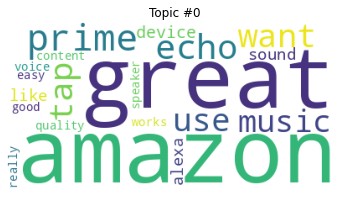

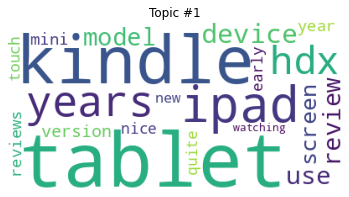

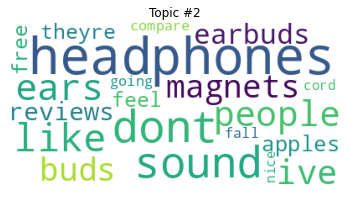

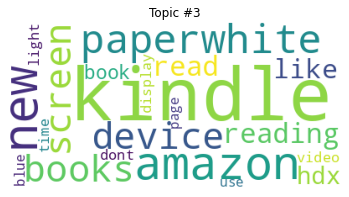

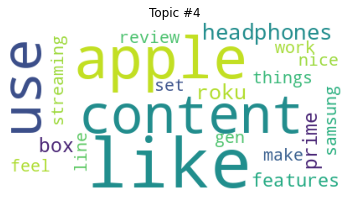

In [14]:
for topic_idx, topic in enumerate(lda_model.components_):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-20 - 1:-1]}
    ))
    plt.axis("off")
    plt.title(f"Topic #{topic_idx}")
    plt.show()
